# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


* На первый взгляд пропуски отсутствуют

In [4]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

* Пропусков в данных нет

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [5]:
n = len(df) #количество строк
X = df[['TV', 'radio', 'newspaper']].values.reshape(n,3) #вектор признаков (предикторов) X 
y = df['sales'] #вектор целевой переменной y

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [6]:
X_ext = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [7]:
X_norm = X_ext / np.sqrt(np.sum(np.square(X_ext), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., m$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{m} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{m} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{n} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{m}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

##### Реализуем координатный спуск с помощью следующего алгоритма:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

In [8]:
w = np.zeros(X_norm.shape[1])
 
for iteration in range(1000):
    r = y - X_norm.dot(w)
    for j in range(len(w)):
        r = r + X_norm[:, j] * w[j]
        w[j] = X_norm[:, j].dot(r)
        r = r - X_norm[:, j] * w[j]
 
print(w)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [9]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X_norm, y)
 
print(model.coef_)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Если вы все сделали верно, они должны практически совпасть!

* Результаты координатного спуска совпали с реализацией линейной регрессии, значит всё сделано верно.

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [10]:
X_scall = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

**Добавим единичный столбец**

In [11]:
X_fin = np.hstack([np.ones(X_scall.shape[0]).reshape(-1, 1), X_scall])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [12]:
def mse_error(y_real, y_pred):
    mse = np.sum((y_real - y_pred) ** 2) / len(y_real)
    return mse

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [13]:
y_pred = np.mean(y) #наивный прогноз средним значением
print('MSE для наивного прогноза средним значением составляет {:.3f}'.format (mse_error(y, y_pred)))

MSE для наивного прогноза средним значением составляет 27.086


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [14]:
w = np.zeros(X_fin.shape[1]) #вектор весов линейной модели w

def lin_pred(X, w):
    return np.dot(X, w)

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [15]:
def stoch_grad_step(X, y, w, train_ind, eta):
    change_direction = X[train_ind] * 2 * (lin_pred(X[train_ind], w) - y[train_ind]) / len(X[train_ind])
    grad_step = w - change_direction * eta
    return grad_step

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [16]:
def stochastic_gradient_descent(X, y, w_init, max_iter, eta, min_weight_dist, seed):
    weight_dist = np.inf
    w = w_init
    cost_list = []
    iter_num = 0
    np.random.seed(seed)
    
    while weight_dist > min_weight_dist and iter_num < max_iter:
        random_ind = np.random.randint(X.shape[0])
        w_new = stoch_grad_step(X, y, w, random_ind, eta)
        current_error = mse_error(y, lin_pred(X, w_new))
        cost_list.append(current_error)
        
        weight_dist = np.linalg.norm(w-w_new)
        w = w_new
        iter_num += 1
                   
    return w, cost_list

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

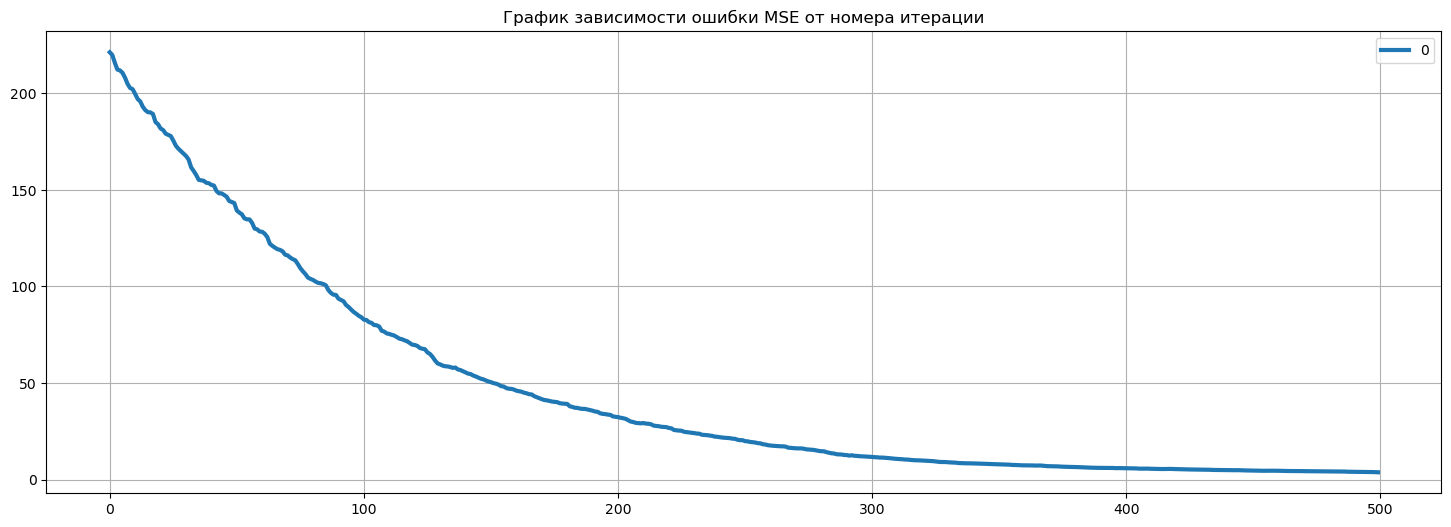

In [26]:
y = np.array(y)
w = np.zeros(X_fin.shape[1]) #начальный вектор весов линейной модели w, заполненный нулями
w, cost_list = stochastic_gradient_descent(X_fin, y, w_init=w, max_iter=500, eta=0.01, min_weight_dist=1e-8, seed=42)

error_df = pd.DataFrame(data=cost_list, index=np.arange(len(cost_list)))
error_df.plot(
    kind='line',
    figsize=(18, 6),
    title='График зависимости ошибки MSE от номера итерации',
    grid = True,
    lw=3
);

**Выведите вектор весов, к которому сошелся метод.**

In [19]:
print('Вектор весов, к которому сошелся метод: {}'.format(w))

Вектор весов, к которому сошелся метод: [13.94233687  3.68052398  2.71826262 -0.01486434]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [20]:
print('Среднеквадратичная ошибку на последней итерации составляет {:.3f}'.format(cost_list[-1]))

Среднеквадратичная ошибку на последней итерации составляет 2.854


In [21]:
mse_error_cd = np.sum((y - np.dot(X_fin, w)) ** 2 ) / len(y)
print('MSE модели координатного спуска составляет {:.3f}'. format(mse_error_cd))

MSE модели координатного спуска составляет 2.854


##### Если сравнивать и оценивать качество обеих полученных моделей: координатный спуск и стохастический градиентный спуск, - с помощью MSE, то получается следующее. MSE в координатном спуске  и в стохастическом градиентном спуске идентичны и равны 2.814.